### Thêm thư viện và khởi tại đối tượng new_student

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.preprocessing import LabelEncoder, label_binarize
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc, mean_squared_error, r2_score)

new_student = {
    'school': 'GP',
    'sex': 'F',
    'age': 17,
    'address': 'U',
    'famsize': 'GT3',
    'Pstatus': 'T',
    'Medu': 4,
    'Fedu': 3,
    'Mjob': 'teacher',
    'Fjob': 'services',
    'reason': 'course',
    'guardian': 'mother',
    'traveltime': 1,
    'studytime': 2,
    'failures': 0,
    'schoolsup': 'yes',
    'famsup': 'no',
    'paid': 'no',
    'activities': 'yes',
    'nursery': 'yes',
    'higher': 'yes',
    'internet': 'yes',
    'romantic': 'no',
    'famrel': 4,
    'freetime': 3,
    'goout': 3,
    'Dalc': 1,
    'Walc': 2,
    'health': 5,
    'absences': 4
}

### Đọc dữ liệu

In [3]:
# Đọc dữ liệu môn Toán
df = pd.read_csv(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat.csv', sep=';')

### Tiền xử lý dữ liệu 
- Thêm nhãn học lực cho sinh viên theo điểm trung bình và loại bỏ G1, G2, G3
- Ghi kết quả vào file CSV

In [18]:
def classify_performance(avg_score):
    if avg_score >= 15:
        return 'Excellent'
    elif avg_score >= 10:
        return 'Good'
    else :
        return 'Average'

def process_student_data(input_csv, output_csv):
    # Đọc dữ liệu từ file CSV
    df = pd.read_csv(input_csv, sep=';')
    
    # Tính điểm trung bình của G1, G2 và G3
    df['avg_score'] = df[['G1', 'G2', 'G3']].mean(axis=1)
    
    # Gán nhãn học lực dựa trên điểm trung bình
    df['G_label'] = df['avg_score'].apply(classify_performance)
    
    # Loại bỏ cột G1, G2, G3 (vì dùng điểm đó để tạo nhãn rồi)
    df = df.drop(columns=['G1', 'G2', 'G3', 'avg_score'])
    
    # Lưu dữ liệu đã xử lý vào file mới
    df.to_csv(output_csv, index=False)
    print(f"Dữ liệu đã được xử lý và lưu vào: {output_csv}")

# Ví dụ sử dụng
process_student_data(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat.csv',
                     r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat-labeled.csv')

Dữ liệu đã được xử lý và lưu vào: D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat-labeled.csv


### Xây dựng và đánh giá mô hình cây quyết định (ID3) và Random Forest Classifier (dự đoán học lực)
- Cân bằng số lượng mẫu thuộc cái lớp khác nhau
- Chia dữ liệu thành 2 phần training set và testing set
- Thực hiện thuật toán


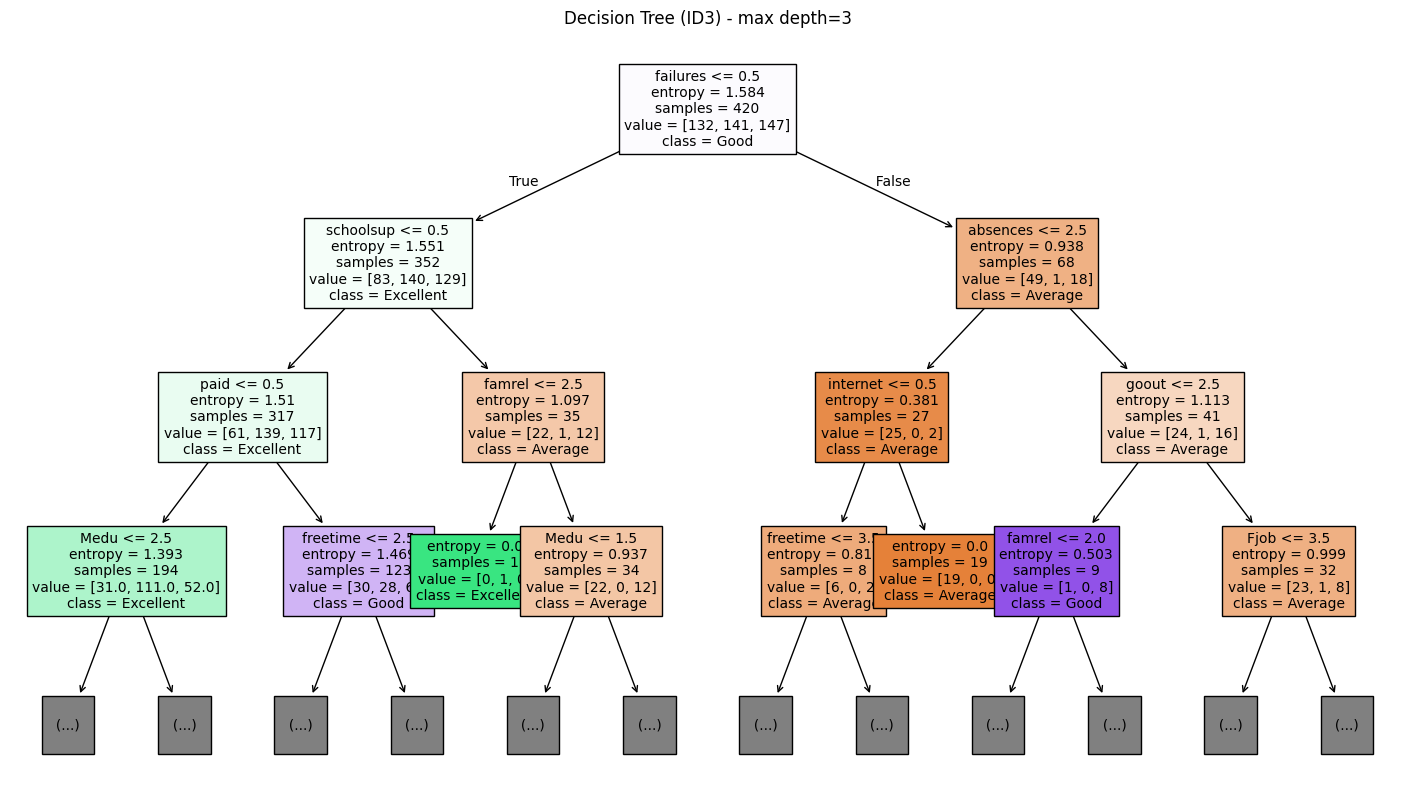

In [43]:
def build_models(input_csv):
    # Đọc dữ liệu
    df = pd.read_csv(input_csv)
    X = df.drop(columns=['G_label'])
    y = df['G_label']

    # Mã hóa categorical features
    for col in X.columns:
        if X[col].dtype == 'object':
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])

    le_y = LabelEncoder()
    y_encoded = le_y.fit_transform(y)
    class_names = le_y.classes_

    # Cân bằng dữ liệu với SMOTE
    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X, y_encoded)

    # Chia train-test
    X_train, X_test, y_train, y_test = train_test_split(
        X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Train Decision Tree
    dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    y_score_dt = dt.predict_proba(X_test)  # cần cho ROC

    # Vẽ cây Decision Tree (chuyển vào đây)
    plt.figure(figsize=(18, 10))
    plot_tree(dt, feature_names=X.columns, class_names=class_names, filled=True, max_depth=3, fontsize=10)
    plt.title("Decision Tree (ID3) - max depth=3")
    plt.show()

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_score_rf = rf.predict_proba(X_test)  # cần cho ROC

    return {
        'dt': dt,
        'rf': rf,
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred_dt': y_pred_dt,
        'y_score_dt': y_score_dt,
        'y_pred_rf': y_pred_rf,
        'y_score_rf': y_score_rf,
        'class_names': class_names,
        'X_columns': X.columns
    }
results = build_models(r'D:\Uni\TheThirdYear\kyii\Chinhthuctrentruong\dw\Final_Assignment_9_Group\Algorithms\id3_random_forest\data\student-mat-labeled.csv')

### Đánh giá mô hình: 
- Độ chính xác, độ nhạy, độ tập trung
- Ma trận nhầm lẫn
- Dường ROC và diện tích UAC


🔹 Accuracy - Decision Tree (ID3): 0.5810
🔹 Classification Report - Decision Tree:
              precision    recall  f1-score   support

     Average       0.66      0.49      0.56        43
   Excellent       0.64      0.79      0.71        34
        Good       0.42      0.46      0.44        28

    accuracy                           0.58       105
   macro avg       0.57      0.58      0.57       105
weighted avg       0.59      0.58      0.58       105


✅ Accuracy - Random Forest (SMOTE): 0.6095
✅ Classification Report - Random Forest:
              precision    recall  f1-score   support

     Average       0.72      0.42      0.53        43
   Excellent       0.74      0.91      0.82        34
        Good       0.39      0.54      0.45        28

    accuracy                           0.61       105
   macro avg       0.62      0.62      0.60       105
weighted avg       0.64      0.61      0.60       105



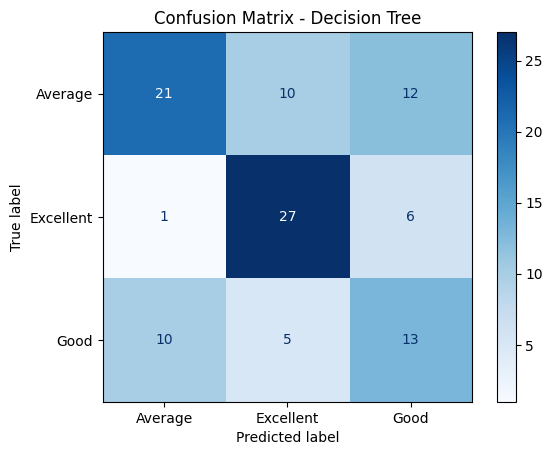

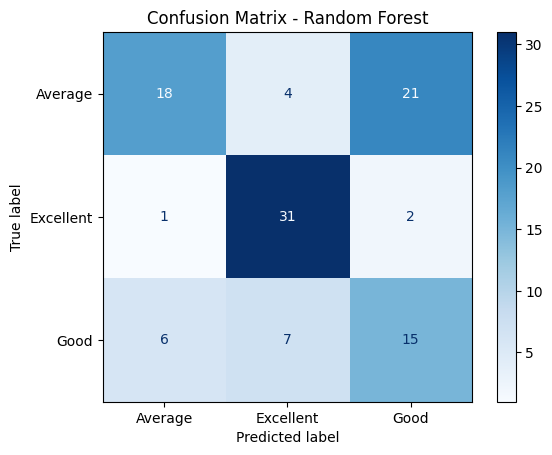

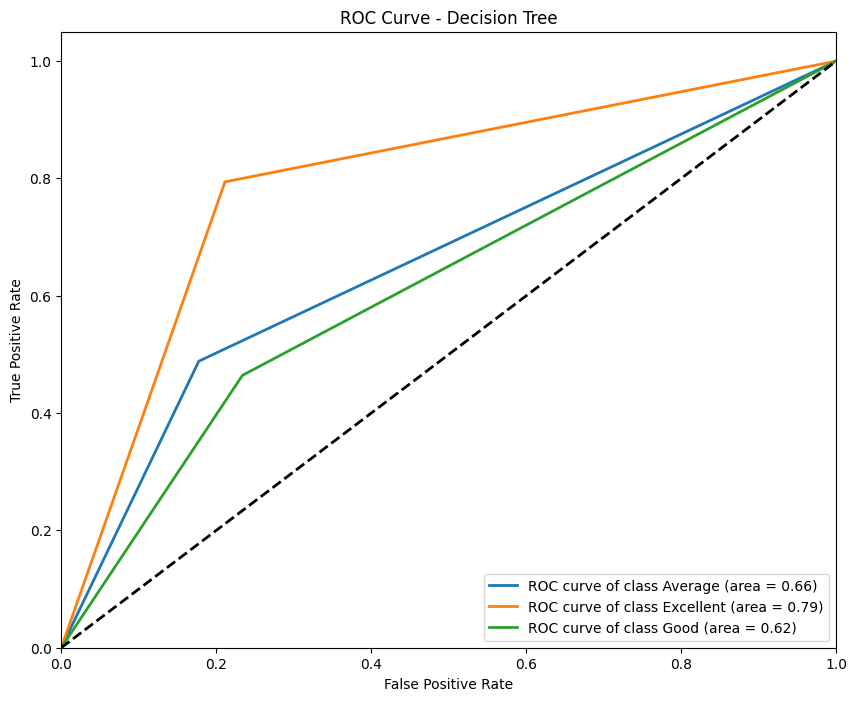

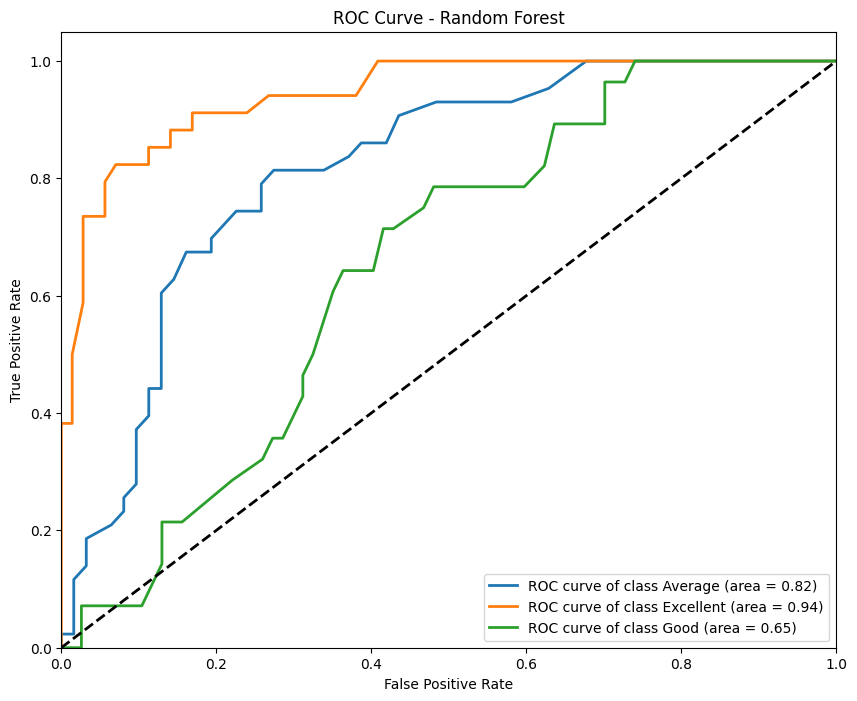

In [ ]:
def evaluate_models(results):
    dt = results['dt']
    rf = results['rf']
    y_test = results['y_test']
    y_pred_dt = results['y_pred_dt']
    y_score_dt = results['y_score_dt']
    y_pred_rf = results['y_pred_rf']
    y_score_rf = results['y_score_rf']
    class_names = results['class_names']

    print(f"\nAccuracy - Decision Tree (ID3): {accuracy_score(y_test, y_pred_dt):.4f}")
    print(f"Classification Report - Decision Tree:\n{classification_report(y_test, y_pred_dt, target_names=class_names)}")

    print(f"\nAccuracy - Random Forest (SMOTE): {accuracy_score(y_test, y_pred_rf):.4f}")
    print(f"Classification Report - Random Forest:\n{classification_report(y_test, y_pred_rf, target_names=class_names)}")

    # Vẽ Confusion Matrix
    def plot_cm(y_true, y_pred, model_name):
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

    plot_cm(y_test, y_pred_dt, "Decision Tree")
    plot_cm(y_test, y_pred_rf, "Random Forest")

    # Vẽ ROC Curve cho từng lớp (multiclass)
    y_test_bin = label_binarize(y_test, classes=np.arange(len(class_names)))

    def plot_roc(y_true_bin, y_score, model_name):
        plt.figure(figsize=(10, 8))
        for i in range(len(class_names)):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2,
                     label=f'ROC curve of class {class_names[i]} (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

    plot_roc(y_test_bin, y_score_dt, "Decision Tree")
    plot_roc(y_test_bin, y_score_rf, "Random Forest")


# === Gọi hàm ===
evaluate_models(results)

In [31]:
# TEST MÔ HÌNH DỰ ĐOÁN HỌC LỰC
# --- 1. Tạo DataFrame từ dict ---
new_df = pd.DataFrame([new_student])

# --- 2. Mã hóa categorical variables giống lúc train ---
new_df_encoded = new_df.copy()
for col in new_df.columns:
    if df[col].dtype == 'object':  # dùng df gốc để lấy categories
        le = LabelEncoder()
        le.fit(df[col])   # fit trên dữ liệu gốc phân loại
        new_df_encoded[col] = le.transform(new_df[col])

# --- 3. Đảm bảo đúng thứ tự cột input mô hình phân loại ---
new_df_encoded = new_df_encoded[X.columns]

# --- 4. Dự đoán phân loại học lực ---
pred_label_encoded = rf.predict(new_df_encoded)[0]  # hoặc dt.predict(...)
pred_label = le_y.inverse_transform([pred_label_encoded])[0]

print(f"Dự đoán phân loại học lực cho học sinh mới: {pred_label}")

Dự đoán phân loại học lực cho học sinh mới: Good


## 3. Xây dựng mô hình Random Forest Regression (dự đoán điểm số)


Random Forest Regression (Multi-output):
MSE G1: 11.16
MSE G2: 10.11
MSE G3: 13.83


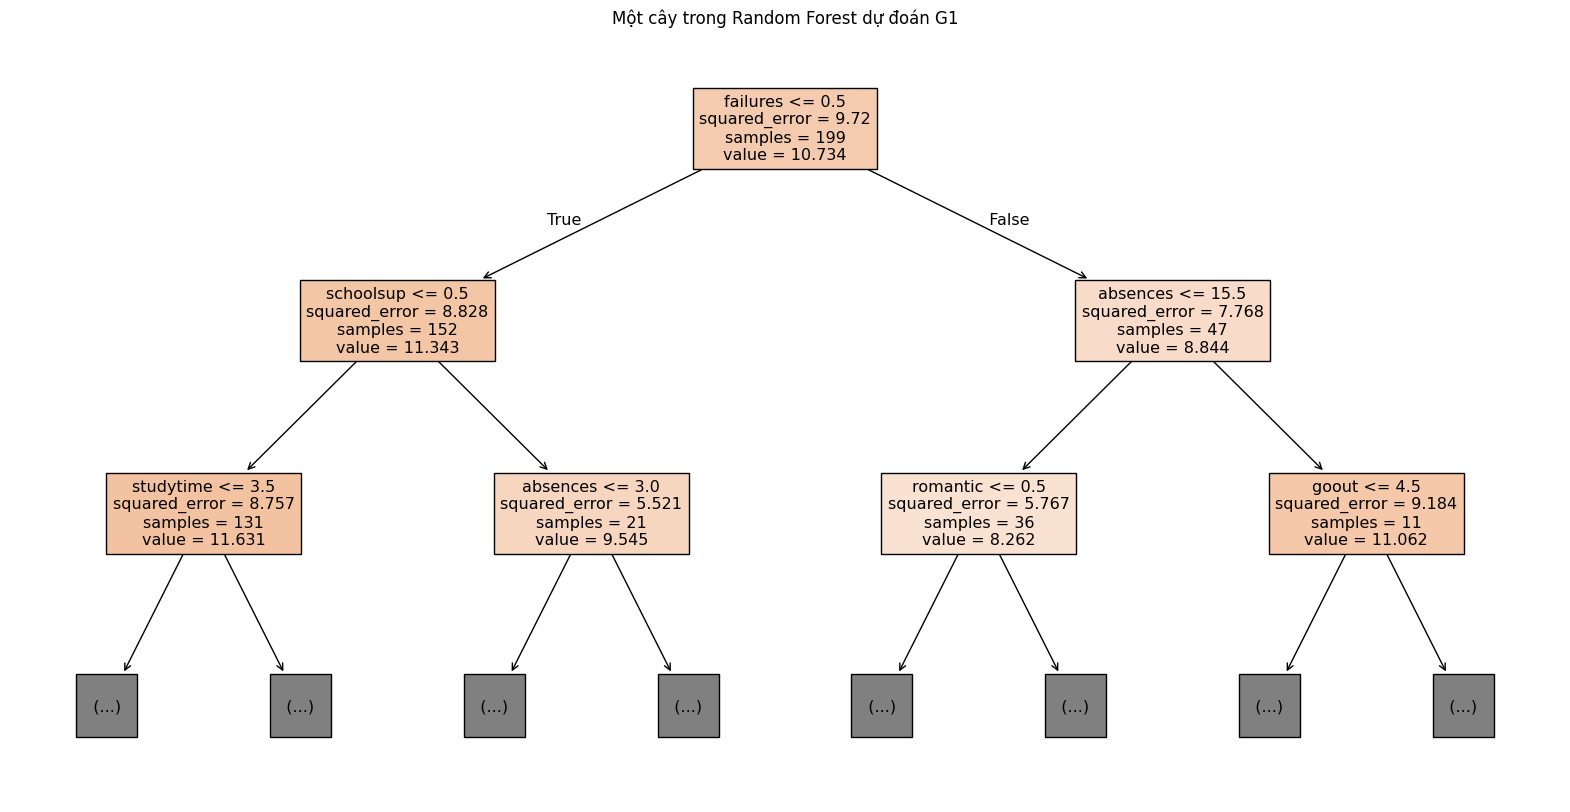

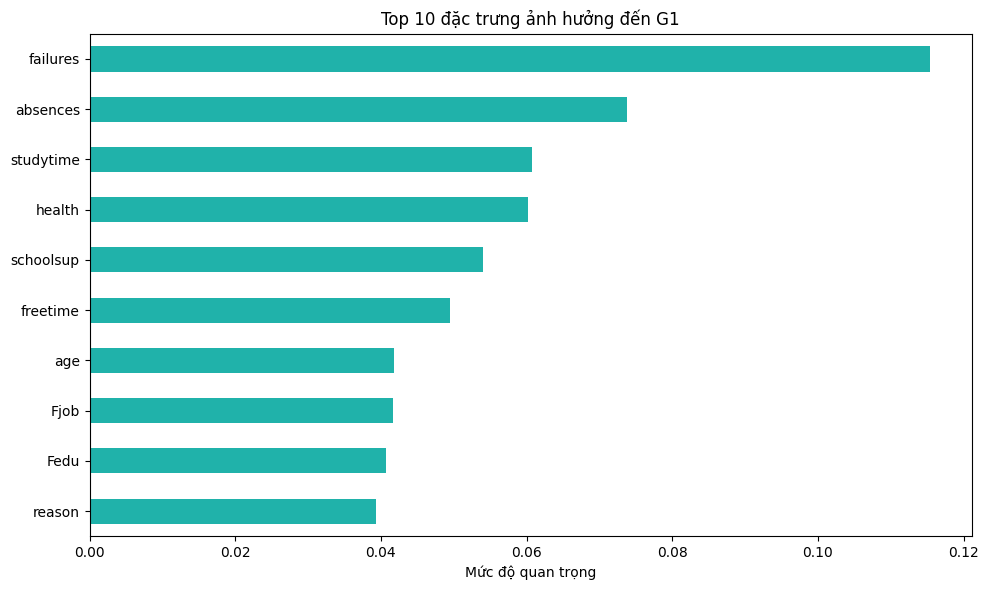

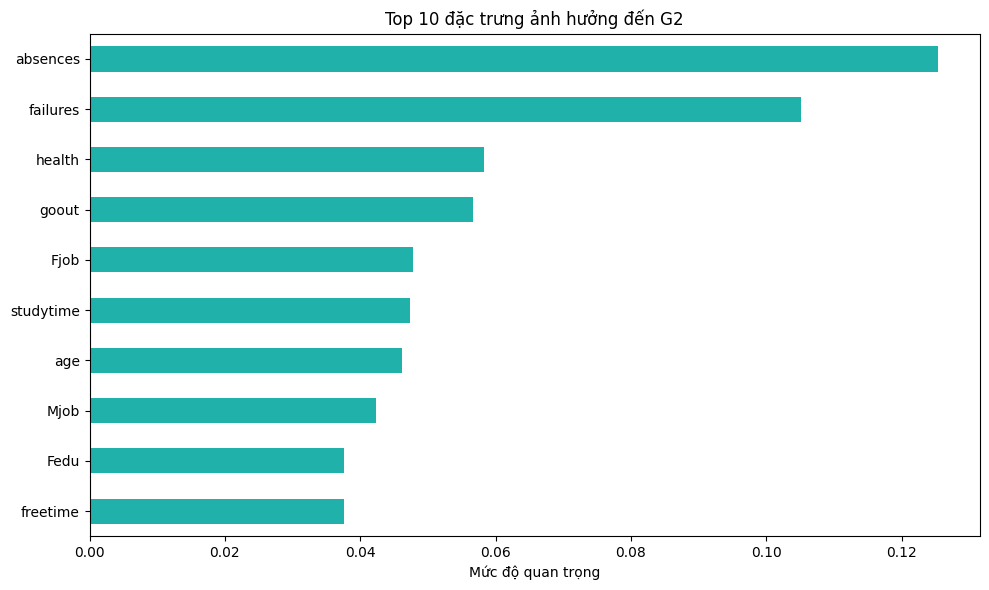

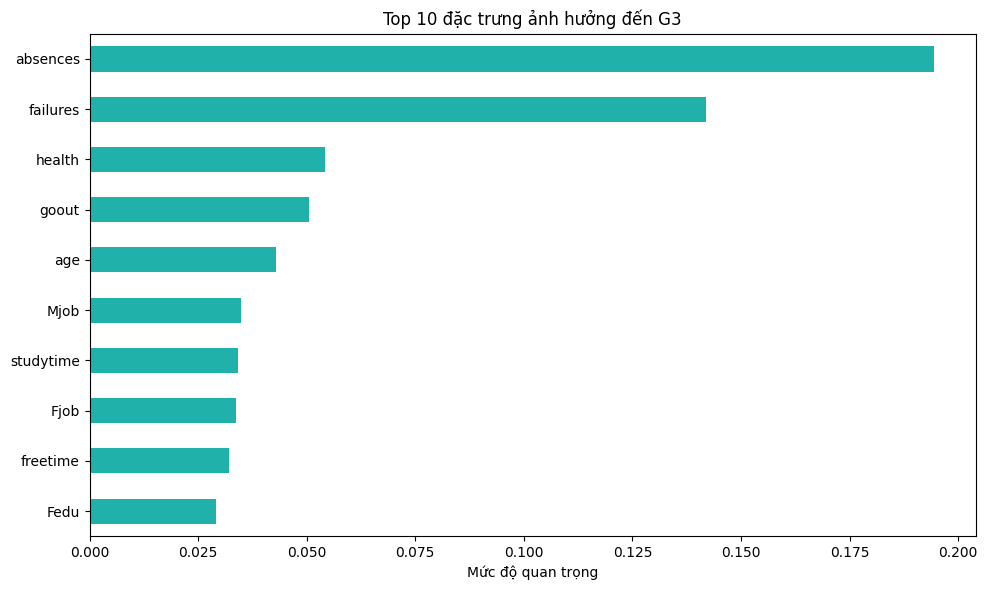

In [35]:
# 1. Mã hóa biến phân loại
df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df[col])

# 2. Tách X và Y
X = df_encoded.drop(['G1', 'G2', 'G3'], axis=1)
Y = df_encoded[['G1', 'G2', 'G3']]

# 3. Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4. Tạo mô hình Random Forest đa đầu ra và huấn luyện
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
multi_forest = MultiOutputRegressor(forest_model)
multi_forest.fit(X_train, y_train)

# 5. Dự đoán
y_pred_forest = multi_forest.predict(X_test)

# 6. Đánh giá MSE cho từng đầu ra
mse_g1_forest = mean_squared_error(y_test.iloc[:, 0], y_pred_forest[:, 0])
mse_g2_forest = mean_squared_error(y_test.iloc[:, 1], y_pred_forest[:, 1])
mse_g3_forest = mean_squared_error(y_test.iloc[:, 2], y_pred_forest[:, 2])

print("\nRandom Forest Regression (Multi-output):")
print(f"MSE G1: {mse_g1_forest:.2f}")
print(f"MSE G2: {mse_g2_forest:.2f}")
print(f"MSE G3: {mse_g3_forest:.2f}")

# 7. Vẽ một cây trong rừng dự đoán G1 (cây đầu tiên trong mô hình đầu ra thứ nhất)
tree_in_forest = multi_forest.estimators_[0].estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_in_forest, feature_names=X.columns, filled=True, max_depth=2)
plt.title("Một cây trong Random Forest dự đoán G1")
plt.show()

# 8. Vẽ biểu đồ tầm quan trọng đặc trưng cho từng đầu ra
titles = ['Top 10 đặc trưng ảnh hưởng đến G1', 
          'Top 10 đặc trưng ảnh hưởng đến G2', 
          'Top 10 đặc trưng ảnh hưởng đến G3']

for i in range(3):
    importances = multi_forest.estimators_[i].feature_importances_
    features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    features.head(10).plot(kind='barh', color='lightseagreen')
    plt.gca().invert_yaxis()
    plt.title(titles[i])
    plt.xlabel("Mức độ quan trọng")
    plt.tight_layout()
    plt.show()

## 4. Đánh giá mô hình

In [36]:
def evaluate_model(y_test, y_pred, model_name):
    for i, label in enumerate(['G1', 'G2', 'G3']):
        mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
        print(f"\n{model_name} - {label}:")
        print(f"  MSE: {mse:.2f}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  R²: {r2:.4f}")

# Chỉ đánh giá Random Forest
evaluate_model(y_test, y_pred_forest, "Random Forest")

# Tạo bảng tổng hợp hiệu suất cho Random Forest
summary = pd.DataFrame({
    'Grade': ['G1', 'G2', 'G3'],
    'MSE': [
        mean_squared_error(y_test.iloc[:, 0], y_pred_forest[:, 0]),
        mean_squared_error(y_test.iloc[:, 1], y_pred_forest[:, 1]),
        mean_squared_error(y_test.iloc[:, 2], y_pred_forest[:, 2]),
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test.iloc[:, 0], y_pred_forest[:, 0])),
        np.sqrt(mean_squared_error(y_test.iloc[:, 1], y_pred_forest[:, 1])),
        np.sqrt(mean_squared_error(y_test.iloc[:, 2], y_pred_forest[:, 2])),
    ],
    'R²': [
        r2_score(y_test.iloc[:, 0], y_pred_forest[:, 0]),
        r2_score(y_test.iloc[:, 1], y_pred_forest[:, 1]),
        r2_score(y_test.iloc[:, 2], y_pred_forest[:, 2]),
    ]
})

print("\n=== Bảng so sánh hiệu suất mô hình Random Forest ===")
print(summary.round(3))



Random Forest - G1:
  MSE: 11.16
  RMSE: 3.34
  R²: 0.1841

Random Forest - G2:
  MSE: 10.11
  RMSE: 3.18
  R²: 0.2902

Random Forest - G3:
  MSE: 13.83
  RMSE: 3.72
  R²: 0.3257

=== Bảng so sánh hiệu suất mô hình Random Forest ===
  Grade     MSE   RMSE     R²
0    G1  11.155  3.340  0.184
1    G2  10.107  3.179  0.290
2    G3  13.826  3.718  0.326


## 5. Ứng dụng

In [37]:


# --- 2. Tạo DataFrame từ dict ---
new_df = pd.DataFrame([new_student])

# --- 3. Mã hóa các biến phân loại giống như lúc huấn luyện ---
new_df_encoded = new_df.copy()
for col in new_df.columns:
    if df[col].dtype == 'object':  # dùng df gốc để lấy unique categories
        le = LabelEncoder()
        le.fit(df[col])  # học từ dữ liệu gốc
        new_df_encoded[col] = le.transform(new_df[col])

# --- 4. Đảm bảo đúng thứ tự cột ---
new_df_encoded = new_df_encoded[X.columns]

# --- 5. Dự đoán bằng mô hình đã huấn luyện ---
predicted = multi_forest.predict(new_df_encoded)

# --- 6. Hiển thị kết quả ---
print(f"Dự đoán điểm G1, G2, G3 cho học sinh mới: {predicted[0]}")


Dự đoán điểm G1, G2, G3 cho học sinh mới: [10.31 11.02 10.77]
